# RandomForest but with Rule (AQ algorithm)

Sample datasets are in the `example_data` folder

## Dataset: `exams_uma.csv`

### Loading the needed libraries

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [33]:
import numpy as np
from core.forest import Forest
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from tqdm import tqdm

### Training and testing

In [ ]:
all_stats = []
acc_list = []

data_exams = np.genfromtxt(fname="example_data/exams_uma.csv", delimiter=";", dtype=str)
data_exams = np.unique(data_exams, axis=0)

for _ in range(30):
    training, test = train_test_split(data_exams, test_size=0.2, random_state=0, shuffle=True)
    forest_exams = Forest(n_tree=100, train_x=training[:,:5], train_y=training[:,5:])
    size = test.shape[0]
    score = []
    results = []
    print("Testing...")
    for test_x in tqdm(test[:,:5]):
        result, prec = forest_exams.predict(test_x)
        results.append(result.tolist())
        score.append(prec)

    test_y = test[:,5:]
    fpr, tpr, _ = metrics.roc_curve(test_y, score, pos_label=['1'])

    stats = {}
    stats["acc"] = metrics.accuracy_score(test_y, results)
    stats["precision"] = metrics.precision_score(test_y, results, labels=['1'], average='micro')
    stats["recall"] = metrics.recall_score(test_y, results, labels=['1'], average='micro')
    stats["f1_score"] = metrics.f1_score(test_y, results, labels=['1'], average='micro')
    stats["auc"] = metrics.auc(fpr, tpr)
    stats["fpr"] = fpr
    stats["tpr"] = tpr
    stats["cm"] = metrics.confusion_matrix(test_y,results)

    all_stats.append(stats)
    

In [39]:
def stats(dict_list, key):
    list = [el[key] for el in dict_list]
    np_list = np.array(list)
    return np.mean(np_list), np.std(np_list)

def get_min_and_max(dict_list, key):
    list = [el[key] for el in dict_list]
    return list.index(min(list)), list.index(max(list))


### Result

In [36]:
#mean and std for acc
stats(all_stats, "acc")

(0.6142857142857144, 0.029023466988153376)

In [35]:
#mean and std for precision
stats(all_stats, "precision")

(0.6781717585686504, 0.016325184663792132)

In [34]:
#mean and std for f1_score
stats(all_stats, "f1_score")

(0.7451472718661267, 0.02309816315445437)

In [42]:
#worst and best index by acc
min, max = get_min_and_max(all_stats, "acc")

### ROC curve for worst and best result

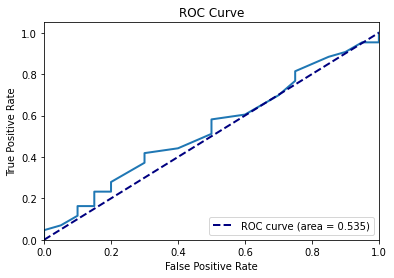

In [43]:
plt.figure()
plt.plot(all_stats[min]["fpr"], all_stats[min]["tpr"], lw=2)
plt.plot([0, 1], 
             [0, 1], 
             color="navy", 
             lw=2, 
             linestyle="--",
             label="ROC curve (area = %0.3f)" % all_stats[min]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

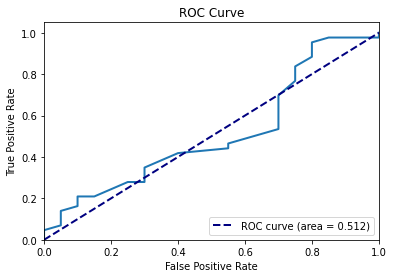

In [45]:
plt.figure()
plt.plot(all_stats[max]["fpr"], all_stats[max]["tpr"], lw=2)
plt.plot([0, 1], 
             [0, 1], 
             color="navy", 
             lw=2, 
             linestyle="--",
             label="ROC curve (area = %0.3f)" % all_stats[max]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

### Confusion Matrix for worst and best

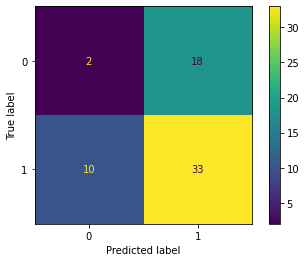

In [46]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[min]["cm"])
pcm.plot()
plt.show()

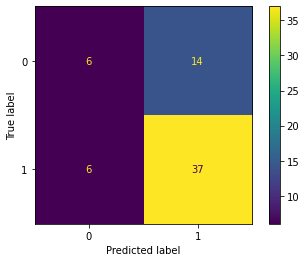

In [47]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[max]["cm"])
pcm.plot()
plt.show()